In [17]:
#library imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [18]:
demo.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [19]:
demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [21]:
demo['TotalCharges']=pd.to_numeric(demo["TotalCharges"], errors='coerce')

In [23]:
demo['TotalCharges'].dtypes

dtype('float64')

In [24]:
demo['gender'].value_counts()

gender
Male      3555
Female    3488
Name: count, dtype: int64

In [25]:
demo['SeniorCitizen'].value_counts()

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

In [31]:
demo['SeniorCitizen'].replace(1,'Yes',regex=True)
demo['SeniorCitizen'].replace(0,'No',regex=True)
demo['SeniorCitizen'].value_counts()

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

In [32]:
demo['Count']=1

In [33]:
demo1=demo[["gender", "SeniorCitizen", "Count"]]
demo1.groupby(["gender", "SeniorCitizen"]).count().reset_index()

,gender,SeniorCitizen,Count
0,Female,0,2920
1,Female,1,568
2,Male,0,2981
3,Male,1,574


Text(0, 0.5, 'Number of subscriers')

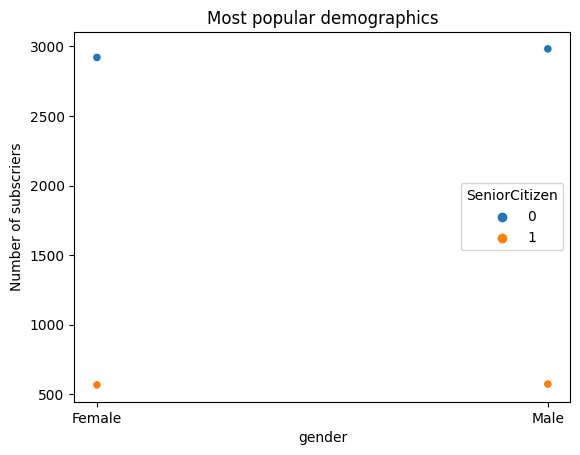

In [34]:
df_demo=demo.groupby(["gender", "SeniorCitizen"])["Count"].count().reset_index()
sns.scatterplot(x="gender", y="Count", hue="SeniorCitizen", data=df_demo)
plt.title("Most popular demographics")
plt.xlabel("gender")
plt.ylabel("Number of subscriers")

In [ ]:
# a. the non senior citizen male telco brand is popular compared to the non senior female citizen. For the senior citizen, the female brand is more popular compared to the male senior citizen.
#b. To increase customer retention, the marketing team should target the non senior citizen

In [35]:
demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [41]:
# Services offered
churning_df = demo[['PhoneService', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'MonthlyCharges', 'Contract', 'Churn']][demo['Churn'] == "Yes"]

churning_df.head() 

,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MonthlyCharges,Contract,Churn
2,Yes,DSL,Yes,Yes,No,No,No,No,53.85,Month-to-month,Yes
4,Yes,Fiber optic,No,No,No,No,No,No,70.70,Month-to-month,Yes
5,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,99.65,Month-to-month,Yes
8,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,104.80,Month-to-month,Yes
13,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,103.70,Month-to-month,Yes


In [42]:
demo.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Count
count,7043.000000,7043.000000,7043.000000,7032.000000,7043.0
mean,0.162147,32.371149,64.761692,2283.300441,1.0
std,0.368612,24.559481,30.090047,2266.771362,0.0
min,0.000000,0.000000,18.250000,18.800000,1.0
25%,0.000000,9.000000,35.500000,401.450000,1.0
50%,0.000000,29.000000,70.350000,1397.475000,1.0
75%,0.000000,55.000000,89.850000,3794.737500,1.0
max,1.000000,72.000000,118.750000,8684.800000,1.0


In [43]:
higherprice=demo[['PhoneService','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport','StreamingTV', 'StreamingMovies', 'MonthlyCharges', 'Churn']][demo['MonthlyCharges']==118.75]
#monitoring the high revenue service
higherprice


,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MonthlyCharges,Churn
4586,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,118.75,No


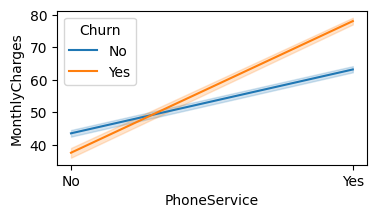

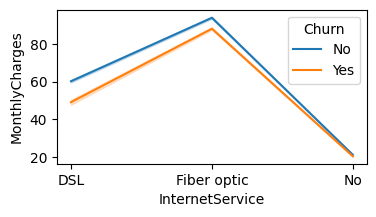

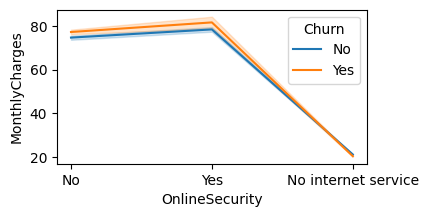

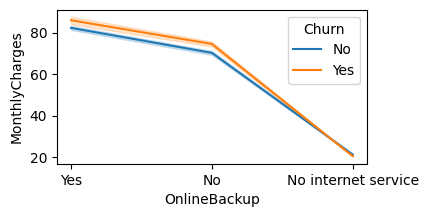

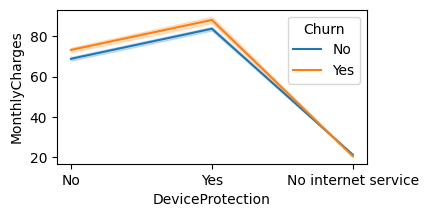

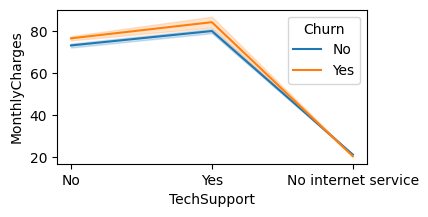

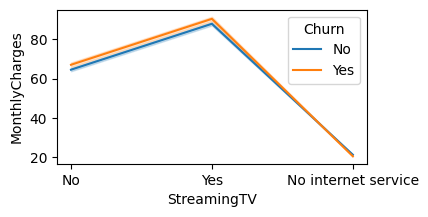

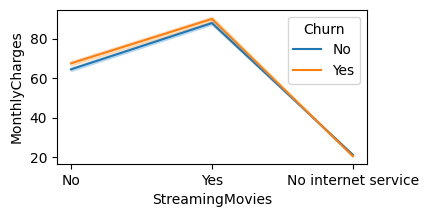

In [45]:
for col in ['PhoneService', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport','StreamingTV', 'StreamingMovies']:
        plt.figure(figsize=(4,2)) 
        sns.lineplot(data=demo,x=col, y='MonthlyCharges', hue='Churn', palette="tab10")
        plt.show()

In [46]:
#If the telco was to offer Phone as a standalone service, which type of contract would encourage customer retention?
demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [48]:
demo['Contract'].value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

Text(0, 0.5, 'No of subscribers')

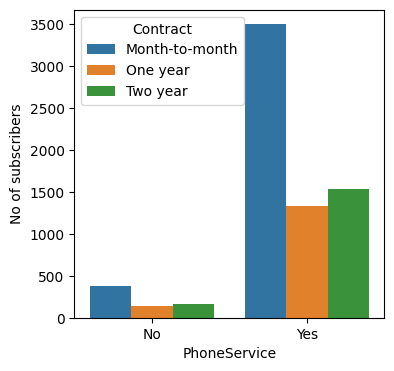

In [49]:
honecontract=demo.groupby(["PhoneService", "Contract"])["Count"].count().reset_index()
plt.figure(figsize=(4,4))
sns.countplot(x="PhoneService", hue="Contract", data=demo)
plt.xlabel("PhoneService")
plt.ylabel("No of subscribers")

In [ ]:
#from the graph above, the month to month contract is more preferred compared to one and two year contracts by customers.This shows only the Senior citizen love on month to month contract compared to non senior citizen

In [50]:
#3. Payment: (Use visualizations in explaining your analysis)
#   a. If the company was to streamline all its services into 3 bouquet packages, what monthly prices will be appropriate for the following packages to keep customers from churning:
#       i. Basic
#       ii. Plus
#       iii. Premium
demo2 = demo[['MonthlyCharges','Churn','Count']]
demo2

,MonthlyCharges,Churn,Count
0,29.85,No,1
1,56.95,No,1
2,53.85,Yes,1
3,42.30,No,1
4,70.70,Yes,1
...,...,...,...
7038,84.80,No,1
7039,103.20,No,1
7040,29.60,No,1
7041,74.40,Yes,1


In [51]:
demo2.groupby(['MonthlyCharges','Churn']).count().reset_index()

,MonthlyCharges,Churn,Count
0,18.25,No,1
1,18.40,No,1
2,18.55,No,1
3,18.70,No,2
4,18.75,No,1
...,...,...,...
2365,118.20,No,1
2366,118.35,Yes,1
2367,118.60,No,2
2368,118.65,No,1


In [52]:
demo['MonthlyCharges'].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1200x500 with 0 Axes>

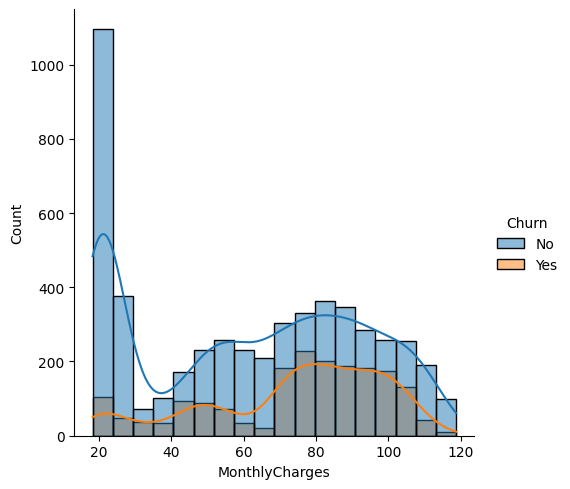

In [54]:
plt.figure(figsize=(12,5))
sns.displot(x="MonthlyCharges", hue="Churn", data=demo, kde=True)
plt.xlabel("MonthlyCharges")
plt.show

In [55]:
#b. Should the company strictly go paperless for their monthly billings as a technique of keeping their customers and why?
demo.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Count
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,1
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1


In [56]:
demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [57]:
demo['PaperlessBilling'].value_counts()

PaperlessBilling
Yes    4171
No     2872
Name: count, dtype: int64

Text(0, 0.5, 'number of subscribers')

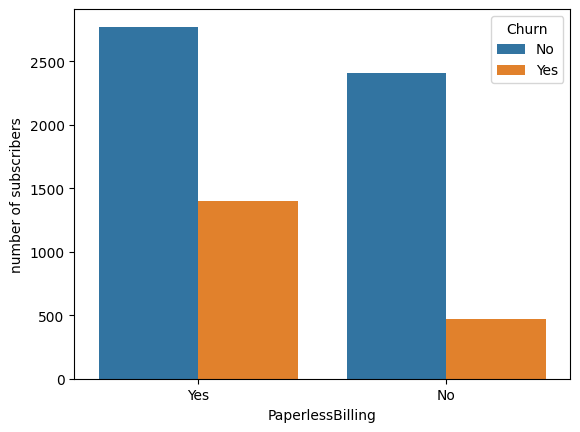

In [58]:
sns.countplot(x="PaperlessBilling", hue="Churn", data=demo)
plt.xlabel("PaperlessBilling")
plt.ylabel(("number of subscribers"))

In [ ]:
# Since the number of both male and female subscribers is very low, the company should consider going paperless and focus on other options to keep the customers